<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: France Martínez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
# Cargar imagen
# Ruta de la imagen (debe estar en la misma carpeta)
ruta = 'image.jpg'

# Con OpenCV
imagen_cv2 = cv2.imread(ruta)
imagen_cv2_rgb = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)

# Con PIL + NumPy
imagen_pil = Image.open(ruta)
imagen_np = np.array(imagen_pil)

# Con PyTorch (desde imagen NumPy)
imagen_torch = torch.from_numpy(imagen_np).permute(2, 0, 1).float() / 255

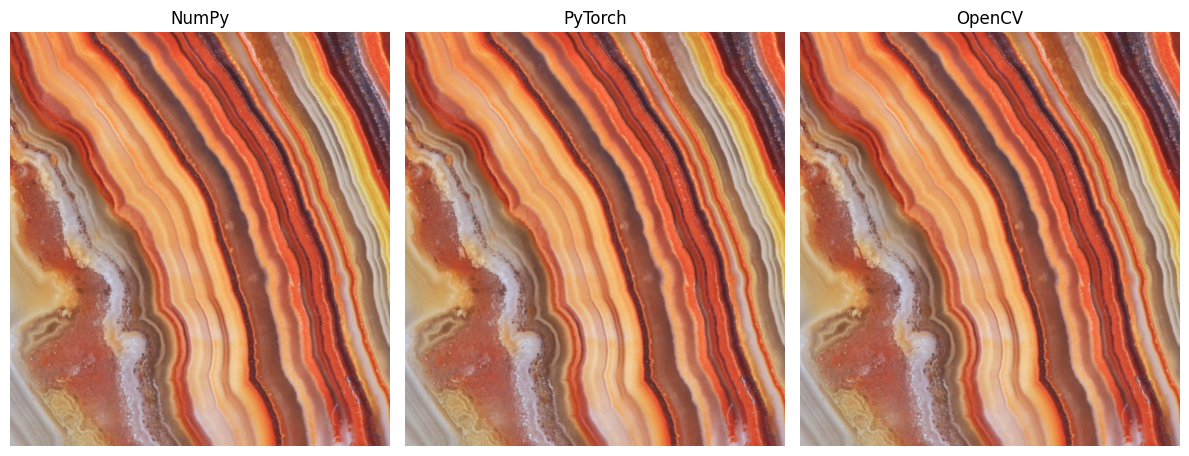

In [7]:
# Mostrar imagen original
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 3)
plt.imshow(imagen_cv2_rgb)
plt.title('OpenCV')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(imagen_np)
plt.title('NumPy')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_torch.permute(1, 2, 0))
plt.title('PyTorch')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Escala de grises con OpenCV
gris_cv2 = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gris_cv2.jpg', gris_cv2)

# Escala de grises con PIL/NumPy
gris_pil = imagen_pil.convert('L')
gris_np = np.array(gris_pil)
gris_pil.save('gris_numpy.jpg')

# Escala de grises con PyTorch (promedio de canales R, G, B)
gris_torch = imagen_torch.mean(dim=0)
gris_torch_np = (gris_torch.numpy() * 255).astype(np.uint8)
Image.fromarray(gris_torch_np).save('gris_torch.jpg')

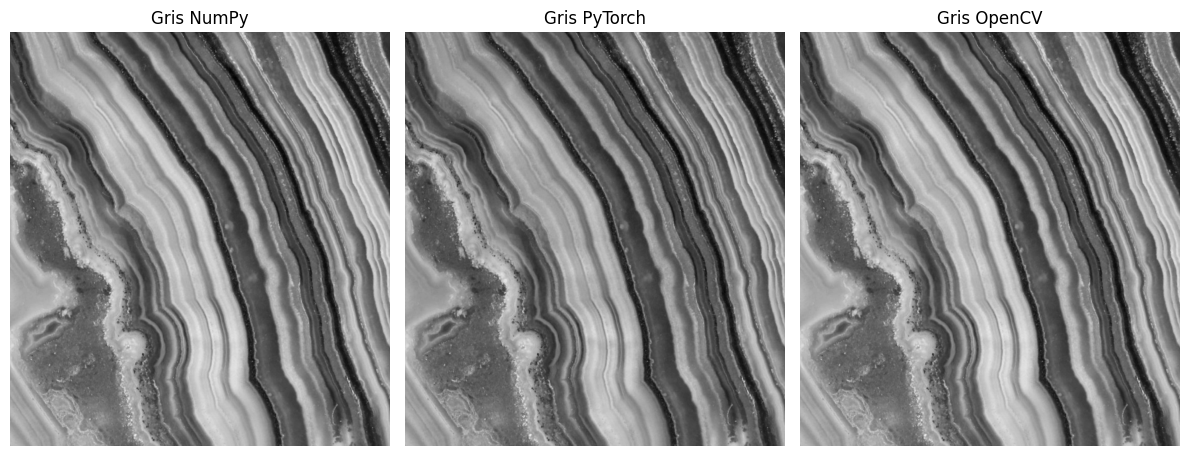

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 3)
plt.imshow(gris_cv2, cmap='gray')
plt.title('Gris OpenCV')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(gris_np, cmap='gray')
plt.title('Gris NumPy')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gris_torch_np, cmap='gray')
plt.title('Gris PyTorch')
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

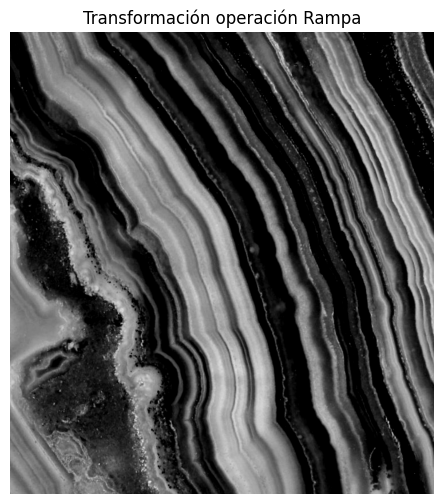

In [ ]:
import torch
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
imagen_tensor = torch.tensor(imagen, dtype=torch.float32)

# Parámetros de rampa
m = 1.5  # pendiente
threshold = 100

# Aplicar transformación: rampa por encima del umbral
transformada = torch.clamp(m * (imagen_tensor - threshold), min=0, max=255)    # Limita los valores del tensor entre un mínimo y máximo, para asegurar que los píxeles queden entre 0 y 255

# Mostrar resultado
plt.figure(figsize=(12, 6))
plt.imshow(transformada.numpy(), cmap='gray')
plt.title('Transformación operación Rampa')
plt.axis('off')
plt.show()

#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



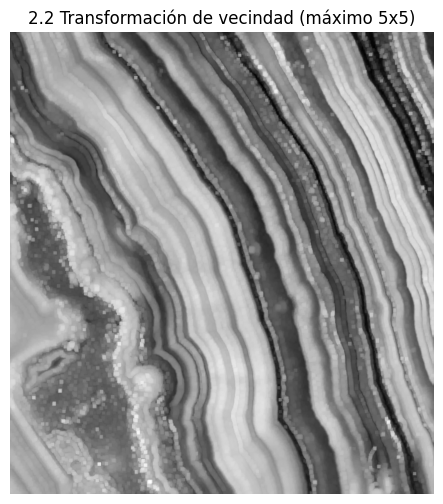

In [ ]:
import torch.nn.functional as F

# El formato NCHW es una forma estándar de organizar tensores de imágenes en Pytorch
# N = Número de imágenes (batch size)
# C = Número de canales
# H = Altura de la imagen
# W = Ancho de la imagen

# Convertir a formato NCHW (Batch, Channel, Height, Width)
img = imagen_tensor.unsqueeze(0).unsqueeze(0)

# Toma el valor máximo en vecindad 5x5
vecindad_5x5 = F.max_pool2d(img, kernel_size=5, stride=1, padding=2) # Busca el valor máximo dentro de cada ventana de 5x5 y lo pone como nuevo valor del píxel central, para realizar una operación similar a un filtrado de dilatación

# Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(vecindad_5x5.squeeze().numpy(), cmap='gray')
plt.title('2.2 Transformación de vecindad (máximo 5x5)')
plt.axis('off')
plt.show()

#### 2.3 Aplica transformación de intensidad
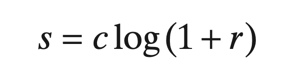
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

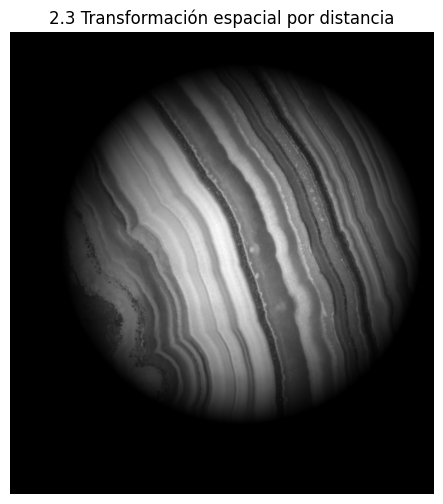

In [ ]:
# Definir coeficiente c
c = 1e-5

# Obtener tamaño
H, W = imagen_tensor.shape
Y, X = torch.meshgrid(torch.arange(H), torch.arange(W), indexing='ij')         # Genera coordenadas X e Y de cada punto de la imagen
xc, yc = H // 2, W // 2
r = torch.sqrt((X - xc)**2 + (Y - yc)**2)       # Calcula la distancia desde el centro para cada píxel

# Aplicar transformación
transformada_r = imagen_tensor * (1 - c * r**2)             # Reduce la intensidad en función de la distancia al centro (oscurece bordes si c > 0)
transformada_r = torch.clamp(transformada_r, 0, 255)

# Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(transformada_r.numpy(), cmap='gray')
plt.title('2.3 Transformación espacial por distancia')
plt.axis('off')
plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

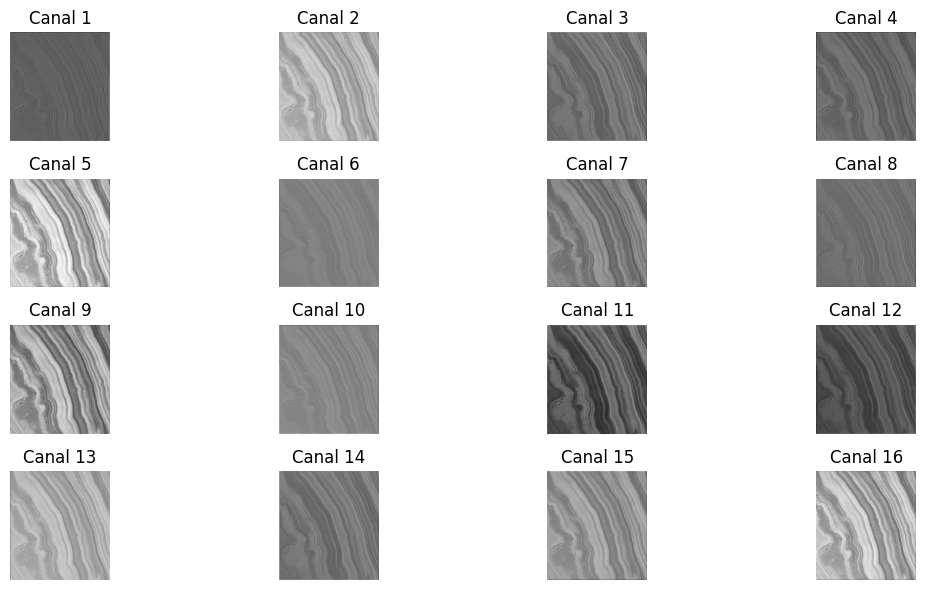

In [ ]:
import torch.nn as nn

# Preparar imagen como batch
entrada = img / 255.0  # normalizar

# Definir capas convolucionales
conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)         # Crea una capa de convolución que aplica varios filtros a la imagen
conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)        # 8, 16 -> número de canales de entrada y salida
conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)

# Aplicar convoluciones
x1 = conv1(entrada)
x2 = conv2(x1)
x3 = conv3(x2)

# Mostrar los 16 canales resultantes
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x3[0, i].detach().numpy(), cmap='gray')
    plt.title(f'Canal {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


In [17]:
# Crear imagen binaria
import cv2

# Cargar imagen en escala de grises
imagen_gris = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar umbral: todo lo mayor a 127 será 255, el resto será 0
_, imagen_binaria = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)

# Guardar
cv2.imwrite('imagen_binaria.png', imagen_binaria)

True

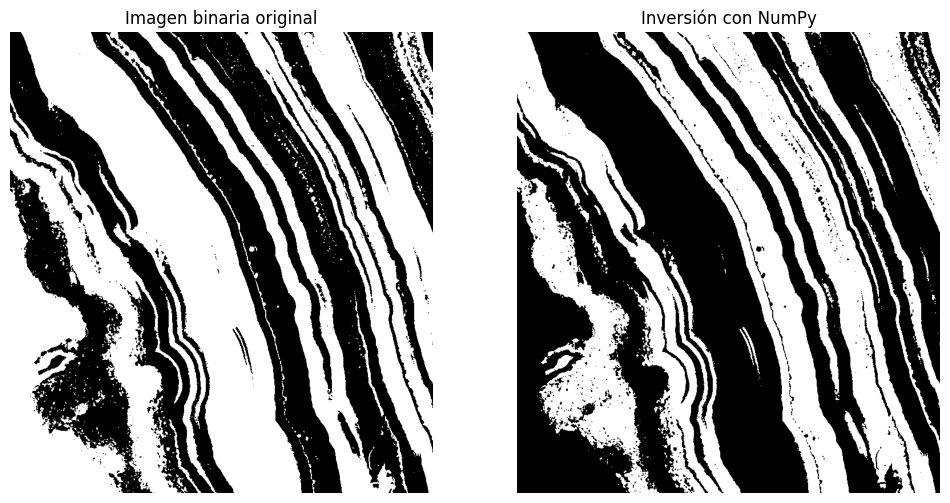

True

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen binaria (valores 0 y 255)
imagen_binaria = cv2.imread('imagen_binaria.png', cv2.IMREAD_GRAYSCALE)

# Asegurarse de que es binaria (umbral simple por si acaso)
_, imagen_binaria = cv2.threshold(imagen_binaria, 127, 255, cv2.THRESH_BINARY)

# Inversión con NumPy
inversa_numpy = 255 - imagen_binaria

# Mostrar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen binaria original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inversa_numpy, cmap='gray')
plt.title('Inversión con NumPy')
plt.axis('off')
plt.show()

# Guardar imagen invertida
cv2.imwrite('inversa_numpy.png', inversa_numpy)

### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



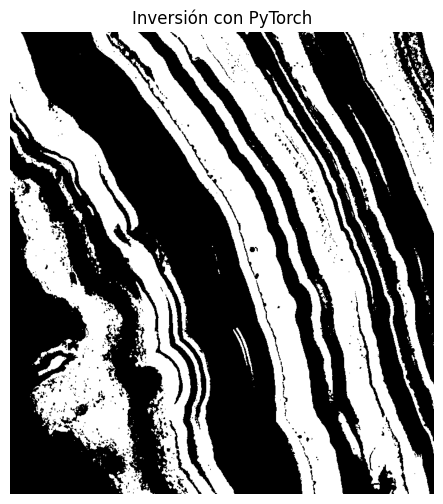

True

In [21]:
import torch

# Convertir imagen a tensor
tensor_img = torch.tensor(imagen_binaria, dtype=torch.float32)

# Inversión
inversa_torch = 255.0 - tensor_img

# Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(inversa_torch.numpy(), cmap='gray')
plt.title('Inversión con PyTorch')
plt.axis('off')
plt.show()

# Guardar
cv2.imwrite('inversa_torch.png', inversa_torch.numpy().astype(np.uint8))

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

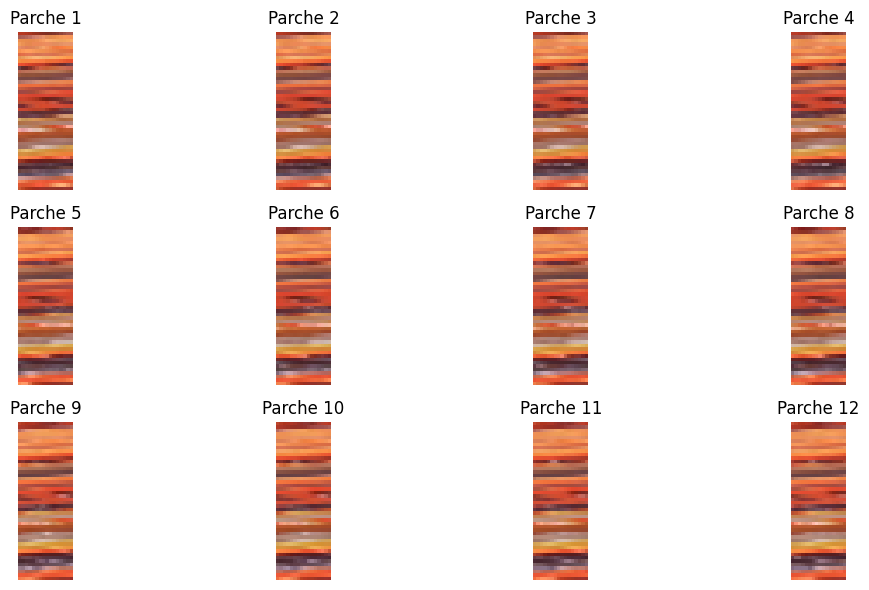

In [23]:
import cv2
import torch
import matplotlib.pyplot as plt

# Cargar imagen (RGB)
imagen = cv2.imread('image.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Convertir a tensor [C, H, W]
tensor = torch.tensor(imagen_rgb, dtype=torch.float32).permute(2, 0, 1) / 255.0
C, H, W = tensor.shape

# Tamaño del parche
patch_size = 16

# Número de parches posibles en altura y ancho
num_h = H // patch_size
num_w = W // patch_size

# Recortar imagen para que calce exacto con parches (si no es múltiplo de 16)
tensor_cropped = tensor[:, :num_h * patch_size, :num_w * patch_size]

# Dividir en parches usando view y permute
patches = tensor_cropped.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
# patches shape: [C, num_h, patch_size, num_w, patch_size] → reorganizar
patches = patches.permute(1, 3, 0, 2, 4)  # [num_h, num_w, C, 16, 16]

# Mostrar los primeros 12 parches
plt.figure(figsize=(12, 6))
count = 0
for i in range(min(num_h, 3)):
    for j in range(min(num_w, 4)):
        count += 1
        plt.subplot(3, 4, count)
        patch = patches[i, j].permute(1, 2, 0).numpy()
        plt.imshow(patch)
        plt.axis('off')
        plt.title(f'Parche {count}')
plt.tight_layout()
plt.show()

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
